In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the datasets
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int32  
 2   Married                  614 non-null    int32  
 3   Self_Employed            614 non-null    int32  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int32  
 10  Dependents_1             614 non-null    bool   
 11  Dependents_2             614 non-null    bool   
 12  Dependents_3+            614 non-null    bool   
 13  Education_Not Graduate   614 non-null    bool   
 14  Property_Area_Semiurban  6

In [5]:
# Handle missing values
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for feature in categorical_features:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)
    test_df[feature].fillna(test_df[feature].mode()[0], inplace=True)

In [6]:
numerical_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for feature in numerical_features:
    train_df[feature].fillna(train_df[feature].median(), inplace=True)
    test_df[feature].fillna(test_df[feature].median(), inplace=True)

In [15]:
train_df.head()

,Loan_ID,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,LP001002,1,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,False,False,False,True,5849.0
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,False,False,6091.0
2,LP001005,1,1,1,3000,0.0,66.0,360.0,1.0,1,False,False,False,False,False,True,3000.0
3,LP001006,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,False,True,False,True,4941.0
4,LP001008,1,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,False,False,False,True,6000.0


In [7]:
# Encode categorical features
le = LabelEncoder()
binary_features = ['Gender', 'Married', 'Self_Employed', 'Loan_Status']
for feature in binary_features:
    train_df[feature] = le.fit_transform(train_df[feature])
    if feature != 'Loan_Status':
        test_df[feature] = le.transform(test_df[feature])

In [8]:
train_df = pd.get_dummies(train_df, columns=['Dependents', 'Education', 'Property_Area'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Dependents', 'Education', 'Property_Area'], drop_first=True)

test_df = test_df.reindex(columns=train_df.columns.drop('Loan_Status'), fill_value=0)

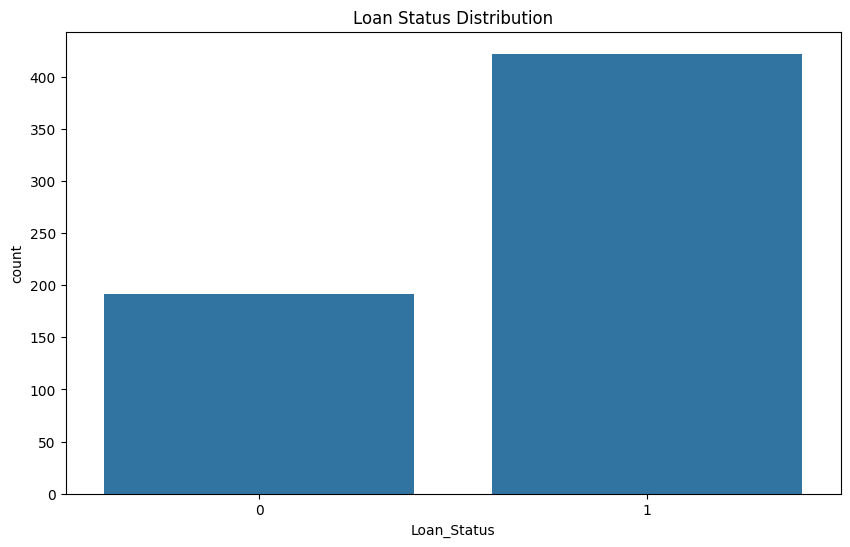

In [9]:
# Plot some insights
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Status Distribution')
plt.show()

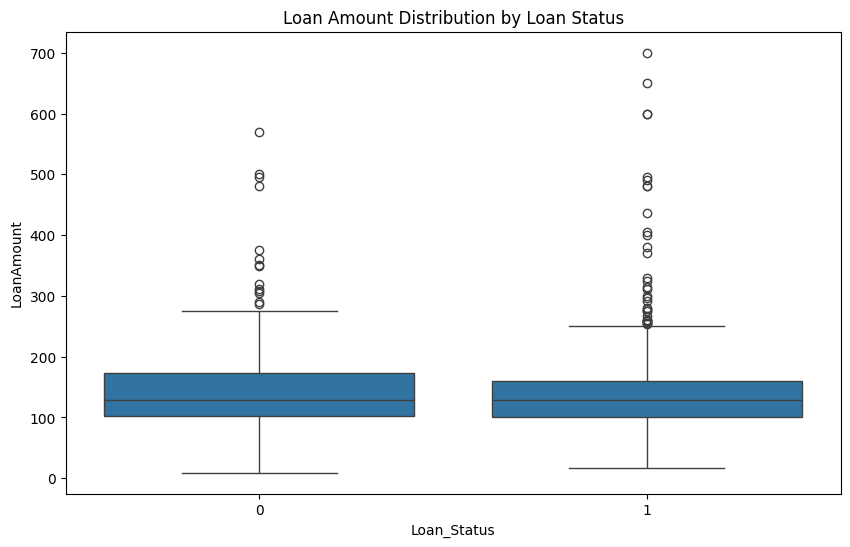

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

In [11]:
# Additional feature engineering example
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']

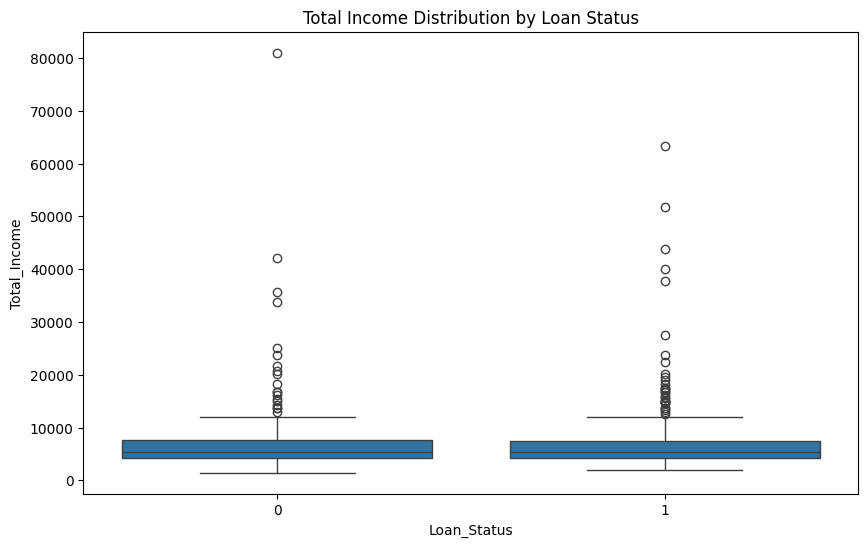

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='Total_Income', data=train_df)
plt.title('Total Income Distribution by Loan Status')
plt.show()